In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [5]:
df = pd.read_csv('lr_range_test_AM0-25_3.csv', index_col=0)

In [6]:
df.head()

,iteration,kldloss,agedelta,lr
1,1,2.278948,8.347909,0.000010
2,2,2.336156,3.394491,0.000095
3,3,2.296959,6.942306,0.000180
4,4,2.370092,5.883798,0.000265
5,5,2.269798,7.532201,0.000350


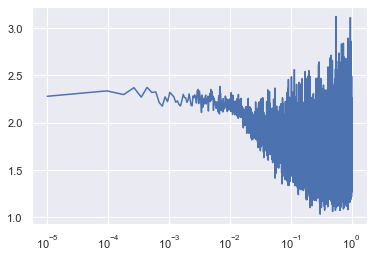

In [9]:
plt.figure()
plt.plot(df.lr, df.kldloss)
plt.xscale('log')

In [48]:
df['change'] = df.kldloss
for i in range(df.shape[0]):
    if i == 0:
        df.change.iloc[0]= 0.0
    else:
        df.change.iloc[i] = df.kldloss.iloc[i] - df.kldloss.iloc[i-1]
df[['change_running','lr_running']] = df.rolling(window=10).mean()[['change','lr']]
df[['kld_running','lr_running']] = df.rolling(window=30).mean()[['kldloss','lr']]

/Users/aroibu_admin/agemapper/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [49]:
df

,iteration,kldloss,agedelta,lr,change,change_running,lr_running,kld_running
1,1,2.278948,8.347909,0.000010,0.000000,NaN,NaN,NaN
2,2,2.336156,3.394491,0.000095,0.057208,NaN,NaN,NaN
3,3,2.296959,6.942306,0.000180,-0.039196,NaN,NaN,NaN
4,4,2.370092,5.883798,0.000265,0.073133,NaN,NaN,NaN
5,5,2.269798,7.532201,0.000350,-0.100295,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11755,11755,1.456023,3.459357,0.999490,-0.174498,0.002075,0.998257,1.645839
11756,11756,1.810332,5.145783,0.999575,0.354308,0.042442,0.998342,1.657944
11757,11757,1.265020,2.229785,0.999660,-0.545312,-0.029123,0.998427,1.643818
11758,11758,1.835641,5.571311,0.999745,0.570621,0.048006,0.998512,1.641201


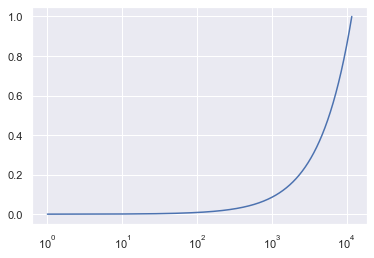

In [51]:
plt.plot(df.lr)
plt.xscale('log')

Text(0, 0.5, 'KLD')

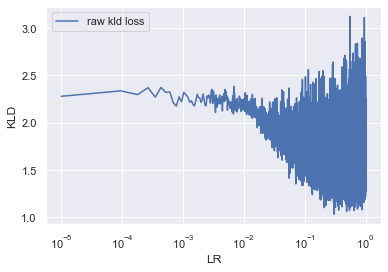

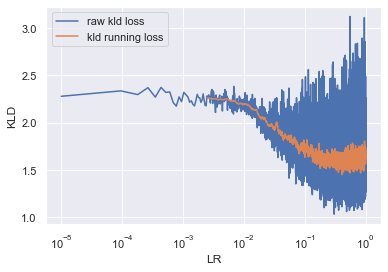

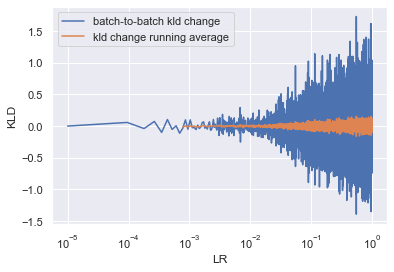

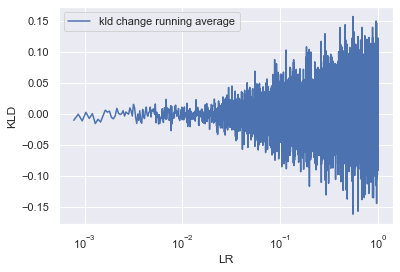

In [56]:
plt.figure()
plt.plot(df.lr, df.kldloss, label='raw kld loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('KLD')
plt.legend()

plt.figure()
plt.plot(df.lr, df.kldloss, label='raw kld loss')
plt.plot(df.lr, df.kld_running, label='kld running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('KLD')
plt.legend()

plt.figure()
plt.plot(df.lr, df.change, label='batch-to-batch kld change')
plt.plot(df.lr, df.change_running, label='kld change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('KLD')

plt.figure()
plt.plot(df.lr, df.change_running, label='kld change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('KLD')

In [52]:
df['age_change'] = df.agedelta
for i in range(df.shape[0]):
    if i == 0:
        df.age_change.iloc[0]= 0.0
    else:
        df.age_change.iloc[i] = df.agedelta.iloc[i] - df.agedelta.iloc[i-1]
df[['age_change_running','lr_running']] = df.rolling(window=10).mean()[['age_change','lr']]
df[['age_running','lr_running']] = df.rolling(window=30).mean()[['agedelta','lr']]

/Users/aroibu_admin/agemapper/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [53]:
df

,iteration,kldloss,agedelta,lr,change,change_running,lr_running,kld_running,age_change,age_change_running,age_running
1,1,2.278948,8.347909,0.000010,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
2,2,2.336156,3.394491,0.000095,0.057208,NaN,NaN,NaN,-4.953419,NaN,NaN
3,3,2.296959,6.942306,0.000180,-0.039196,NaN,NaN,NaN,3.547816,NaN,NaN
4,4,2.370092,5.883798,0.000265,0.073133,NaN,NaN,NaN,-1.058509,NaN,NaN
5,5,2.269798,7.532201,0.000350,-0.100295,NaN,NaN,NaN,1.648403,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11755,11755,1.456023,3.459357,0.999490,-0.174498,0.002075,0.998257,1.645839,-0.959905,0.041639,4.054863
11756,11756,1.810332,5.145783,0.999575,0.354308,0.042442,0.998342,1.657944,1.686426,0.224147,4.121066
11757,11757,1.265020,2.229785,0.999660,-0.545312,-0.029123,0.998427,1.643818,-2.915999,-0.245427,4.049720
11758,11758,1.835641,5.571311,0.999745,0.570621,0.048006,0.998512,1.641201,3.341527,0.235736,4.079321


Text(0, 0.5, 'Age Delta')

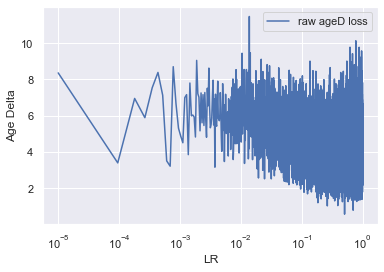

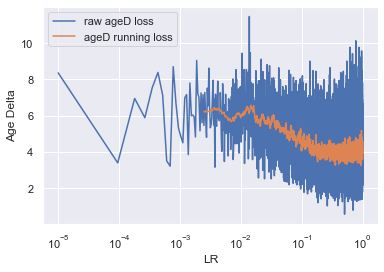

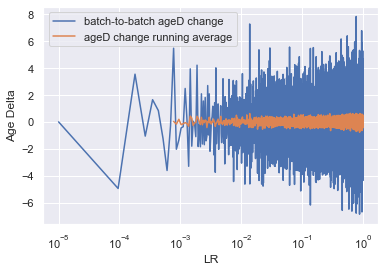

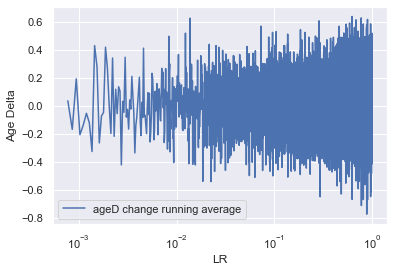

In [58]:
plt.figure()
plt.plot(df.lr, df.agedelta, label='raw ageD loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.legend()

plt.figure()
plt.plot(df.lr, df.agedelta, label='raw ageD loss')
plt.plot(df.lr, df.age_running, label='ageD running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.legend()

plt.figure()
plt.plot(df.lr, df.age_change, label='batch-to-batch ageD change')
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('Age Delta')

plt.figure()
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('KLD')
plt.ylabel('Age Delta')